<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/Automobile-by-AhmedMorra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Automobile Data set**



In this notebook I will explore the Automobile data set from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)

Apply Data Analysis, Data Visualization and Predictive Modeling

1.Data acquisition

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv

--2019-12-10 14:58:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24916 (24K) [text/csv]
Saving to: ‘auto.csv’

auto.csv            100%[===================>]  24.33K  --.-KB/s    in 0.02s   

2019-12-10 14:58:53 (1.14 MB/s) - ‘auto.csv’ saved [24916/24916]



2.Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

3.Put the data into a data frame

In [ ]:
df = pd.read_csv('auto.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


4. Add headers to the data

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


5. Deal with missing values

In [ ]:
#Missing data has the ? sign
#let's change it to NAN
df.replace('?',np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
missing = df.isnull()
missing.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for i in missing.columns.values.tolist():
  print(i)
  print(missing[i].value_counts())
  print("")

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

I have an idea about what columns have missing data and what doesn't.

Now let's replace them one by one

In [ ]:
df['normalized-losses'].astype('float64').mean()

122.0

In [ ]:
df['normalized-losses'].replace(np.nan,122,inplace=True)


In [ ]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

In [ ]:
df['bore'].astype('float64').mean()

3.3290500000000014

In [ ]:
df['bore'].replace(np.nan,3.33,inplace=True)

In [ ]:
df['stroke'].astype('float64').mean()

3.258299999999994

In [ ]:
df['stroke'].replace(np.nan,3.26,inplace=True)

In [ ]:
df['horsepower'].astype('float64').mean()

104.22277227722772

In [ ]:
df['horsepower'].replace(np.nan,104.22,inplace=True)

In [ ]:
df['peak-rpm'].astype('float64').mean()

5125.990099009901

In [ ]:
df['peak-rpm'].replace(np.nan,5125.99,inplace=True)

In [ ]:
df.shape

(204, 26)

In [ ]:
#drop the rows the doesn;t have prices
df.dropna(subset=["price"], axis=0, inplace=True)
#reset the index because we droped 4 rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(200, 26)

6. correct data format

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
df[['normalized-losses','horsepower','peak-rpm','price']] = df[['normalized-losses','horsepower','peak-rpm','price']].astype('int64')
df[['bore','stroke']] = df[['bore','stroke']].astype('float64')

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

7. Data Standardization


Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.

In [ ]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000


8. Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [ ]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000


9. Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

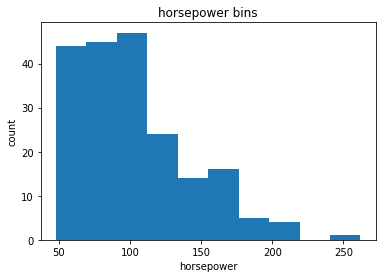

In [ ]:
plt.hist(df['horsepower'])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
df['horsepower-binned'] = pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


In [ ]:
df['horsepower-binned'].value_counts()

Low       152
Medium     43
High        5
Name: horsepower-binned, dtype: int64

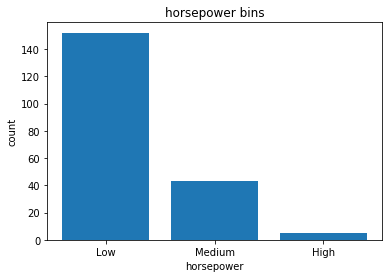

In [ ]:
plt.bar(group_names,df['horsepower-binned'].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

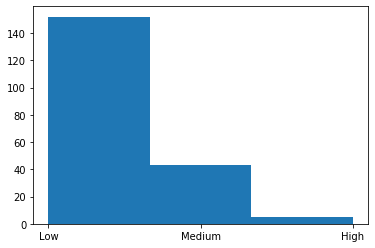

In [ ]:
plt.hist(df['horsepower-binned'],bins=3)
plt.show()

10. Get Dummies

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

We do it So we can use categorical variables for regression analysis in the later modules.

In [ ]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df = pd.concat([df,dummy_variable_1],axis=1)
df.drop('fuel-type',axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000,Low,0,1


In [ ]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df = pd.concat([df,dummy_variable_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000,Low,0,1,1,0


11. Visualize Correlations


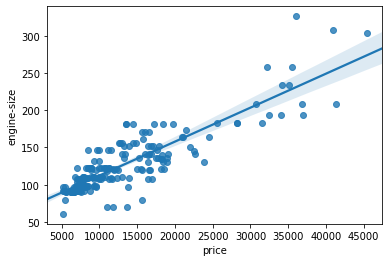

In [ ]:
sb.regplot('price','engine-size',data=df)
plt.show()

In [ ]:
df[['price','engine-size']].corr()

,price,engine-size
price,1.000000,0.872337
engine-size,0.872337,1.000000


Strong positive correlation between Price and Engin esize

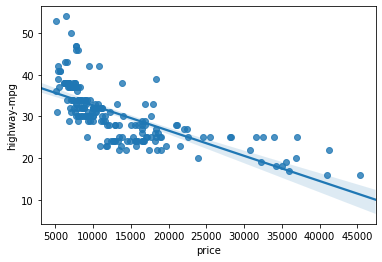

In [ ]:
sb.regplot('price','highway-mpg',data=df)
plt.show()

In [ ]:
df[['price','highway-mpg']].corr()

,price,highway-mpg
price,1.000000,-0.705115
highway-mpg,-0.705115,1.000000


Strong Negative correlation between Price and Highway Mile per Galon

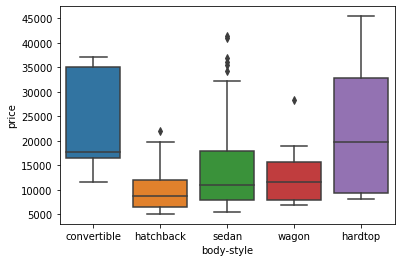

In [ ]:
sb.boxplot('body-style','price',data=df)
plt.show()

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.

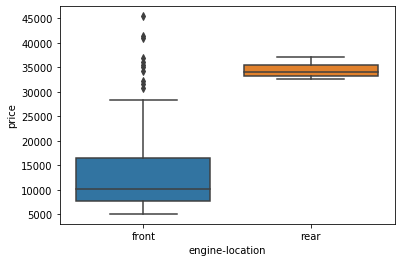

In [ ]:
sb.boxplot('engine-location','price',data=df)
plt.show()

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

In [ ]:
grouped = df.groupby(['drive-wheels','body-style'])['price'].mean()
grouped = grouped.reset_index()
grouped

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [ ]:
grouped_pivot = grouped.pivot('drive-wheels','body-style','price')
grouped_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.00,8249.000000,8396.387755,9811.800000,9997.333333
rwd,26563.25,24202.714286,14337.777778,21711.833333,16994.222222


let's visualize that

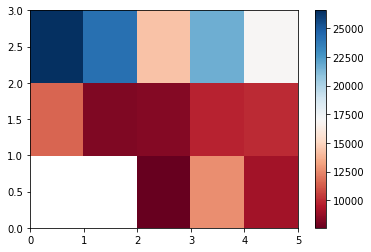

In [ ]:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

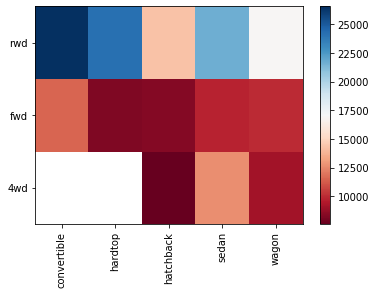

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot,cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.astype(str).tolist()
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1])+.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+.5, minor=False)

ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

plt.xticks(rotation = 90)

fig.colorbar(im)

plt.show()

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

the p-value is  <  0.05: there is moderate evidence that the correlation is significant.

the p-value is  <  0.1: there is weak evidence that the correlation is significant.

the p-value is  >  0.1: there is no evidence that the correlation is significant.

 We can obtain this information using  "stats" module in the "scipy"  library.

In [ ]:
from scipy import stats

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.4570195020504053e-20


Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8096565575365612  with a P-value of P =  1.0468839625927006e-47


Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

In [ ]:
anovatest = df[['drive-wheels', 'price']].groupby(['drive-wheels'])
anovatest.head(2)

,drive-wheels,price
0,rwd,16500
1,rwd,16500
2,fwd,13950
3,4wd,17450
4,fwd,15250
135,4wd,7603


In [ ]:
anovatest.get_group('4wd')['price']

3      17450
135     7603
139     9233
140    11259
143     8013
144    11694
149     7898
150     8778
Name: price, dtype: int64

In [ ]:
f_val,p_val = stats.f_oneway(anovatest.get_group('4wd')['price'],anovatest.get_group('fwd')['price'],anovatest.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 68.49603532807176 , P = 2.6116313994533863e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [ ]:
f_val,p_val = stats.f_oneway(anovatest.get_group('4wd')['price'],anovatest.get_group('fwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


In [ ]:
f_val,p_val = stats.f_oneway(anovatest.get_group('4wd')['price'],anovatest.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.67069478113451 , P = 0.004232262975461328


In [ ]:
f_val,p_val = stats.f_oneway(anovatest.get_group('fwd')['price'],anovatest.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 131.59324661179534 , P = 1.7388247444783448e-23


**Now let's do some predictive modeling**

**Let's start with Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

In [ ]:
lm.intercept_

38470.63700549667

In [ ]:
lm.coef_

array([-822.82843203])

**Now let's try Multiple Linear Regression**

In [ ]:
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df[['price']]

In [ ]:
lm.fit(x,y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhatt = lm.predict(x)

In [ ]:
lm.coef_

array([[53.5112049 ,  4.70487452, 81.53080659, 35.87654175]])

In [ ]:
lm.intercept_

array([-15794.35437121])

**Let's Visualize the difference between Fitted Data and Actual Data**

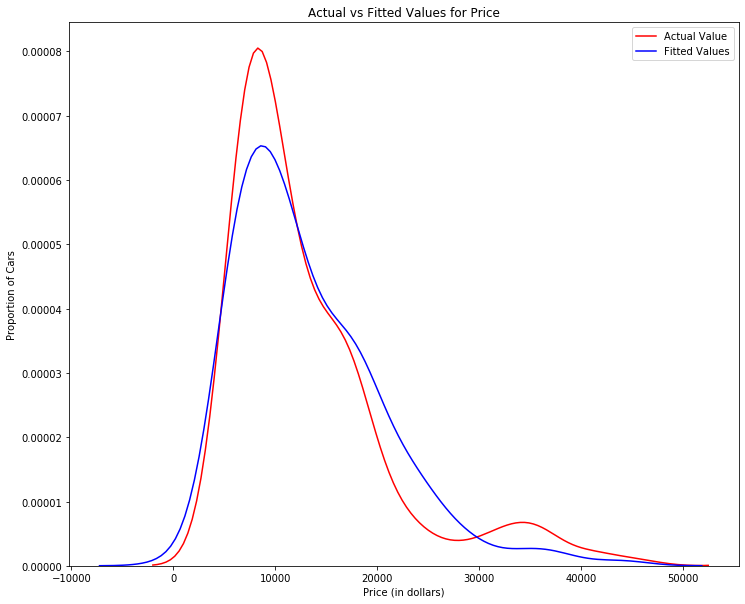

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sb.distplot(y, hist=False, color="r", label="Actual Value")
sb.distplot(yhatt, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Polynomial Regression and Pipelines**

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

We will use the following function to plot the data:

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


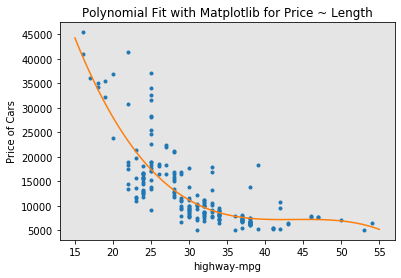

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

We can perform a polynomial transform on multiple features. First, we import the module:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(200, 4)

In [ ]:
Z_pr.shape

(200, 15)

**Pipeline**

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13094.88646565, 18222.75956485, 10386.17943722, 16125.1447952 ])

**Measures for In-Sample Evaluation**

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared

Mean Squared Error (MSE)

R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.49718675257265266


In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16254.26934067 17077.0977727  13785.78404458 20368.41150083]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31755395.41081296


In [ ]:
dfn = df._get_numeric_data()
dfn.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704,0,1,1,0
1,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462,0,1,1,0
2,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333,0,1,1,0
3,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818,0,1,1,0
4,2,122,99.8,0.851994,0.920833,0.887960,2507,136,3.19,3.40,8.5,110,5500,19,25,15250,12.368421,9.400000,0,1,1,0


In [ ]:
y = dfn['price']
x = dfn.drop('price',axis=1)

**Splitting the Data Set into trainging and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 30
number of training samples: 170


In [ ]:
lr =LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(x_test,y_test)

0.8293258355715715

In [ ]:
lr.score(x_train,y_train)

0.8626422242731367

Sometimes you do not have sufficient testing data; as a result, you may want to perform **Cross-validation**. Let's go over several methods that you can use for Cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv' determines the number of folds; in this case 4.

In [ ]:
Rcross = cross_val_score(lr, x[['horsepower']], y, cv=4)

The default scoring is R^2; each element in the array has the average R^2 value in the fold:

In [ ]:
Rcross

array([0.77474062, 0.5172957 , 0.74777703, 0.04701847])

We can calculate the average and standard deviation of our estimate:

In [ ]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5217079546458682 and the standard deviation is 0.29175431773738775


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

In [ ]:
-1 * cross_val_score(lr,x[['horsepower']], y,cv=4,scoring='neg_mean_squared_error')

array([20648006.60031451, 43733821.19046849, 12543435.01689939,
       17587351.09090061])

**We can also use the function 'cross_val_predict' to predict the output.**

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
yhat = cross_val_predict(lr,x[['horsepower']], y,cv=4)
yhat[0:5]

array([14142.23793549, 20815.3029844 , 12745.549902  , 14762.9881726 ,
       13987.05037621])

**Thank you!**